[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



categorical: Sex
quantitative: Height
discrete: Number of Siblings
continuous: Time

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns
carbon_west = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat", sep='\s+')

In [ ]:
carbon_west.describe()


,CO2
count,35.000000
mean,6.717143
std,3.356949
min,2.000000
25%,4.450000
50%,5.900000
75%,8.000000
max,16.500000


Part a. Construct a histogram of CO2 emissions.

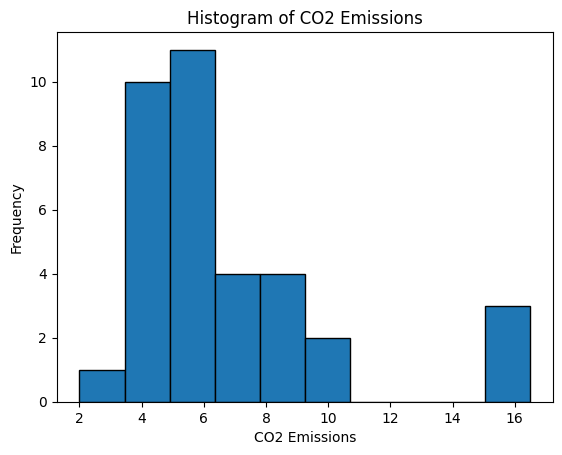

In [ ]:
plt.hist(carbon_west['CO2'], bins=10, edgecolor='black')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emissions')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [ ]:
std = carbon_west.describe().loc['std']['CO2']
mean = carbon_west.describe().loc['mean']['CO2']
median = carbon_west.describe().loc['50%']['CO2']
print(mean)
print(median)
print(std)

6.717142857142858
5.9
3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [ ]:
murders = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Murder.dat",  sep='\\s+')

In [ ]:
murders_no_dc = murders.drop(murders.index[50])
murders_no_dc

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6
5,CO,3.9
6,CT,2.8
7,DE,5.6
8,FL,5.0
9,GA,6.7


Part a. Find the mean and standard deviation for murders without D.C.

In [ ]:
murders_no_dc_std = murders_no_dc.describe().loc['std']['murder']
murders_no_dc_mean = murders_no_dc.describe().loc['mean']['murder']
print(murders_no_dc_mean)
print(murders_no_dc_std)

4.874
2.586291174793806


Part b. Find the five-number  summary without D.C.

In [ ]:
no_dc_5n = murders_no_dc.describe().loc[['min', '25%', '50%', '75%', 'max']]
no_dc_5n

,murder
min,1.000
25%,2.625
50%,4.850
75%,6.175
max,12.400


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [ ]:
murders_std = murders.describe().loc['std']['murder']
murders_mean = murders.describe().loc['mean']['murder']
m5n = murders.describe().loc[['min', '25%', '50%', '75%', 'max']]
print(murders_mean)
print(murders_std)
print(m5n)

5.252941176470588
3.7253914125190373
     murder
min    1.00
25%    2.65
50%    5.00
75%    6.45
max   24.20


the mean is much more affected by the outlier, increasing by 1.25 rather than the .15 of the median

the range is much more effected than the IQR

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [ ]:
houses = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Houses.dat",  sep='\\s+')
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


Part a. Construct a scatterplot between square feet and price of a home.

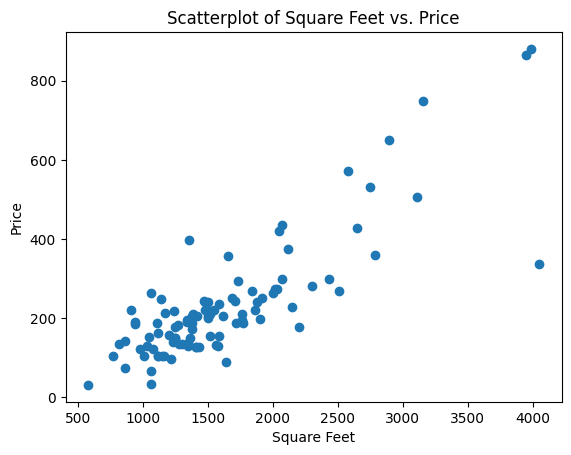

In [ ]:
plt.scatter(houses['size'], houses['price'])
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Scatterplot of Square Feet vs. Price')
plt.show()

Part b. Find the correlation between the two variables.

In [ ]:
houses.corr()['size']['price']

0.8337847885586536

Part c. Find and plot the regression line on top of the scatterplot.

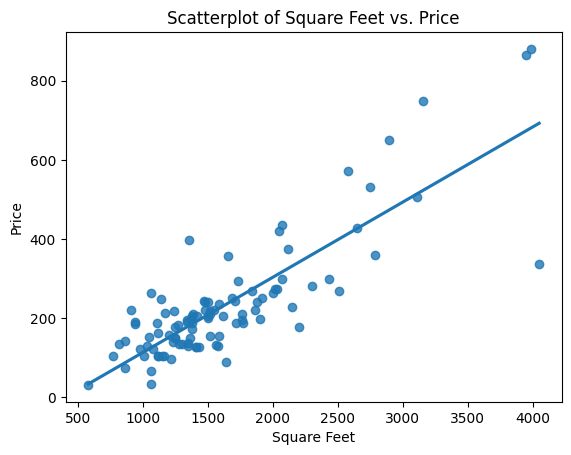

In [ ]:
size = houses['size']
price = houses['price']
sns.regplot(x=size, y=price, scatter=True, ci=None)
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Scatterplot of Square Feet vs. Price')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

Text(0, 0.5, 'Price')

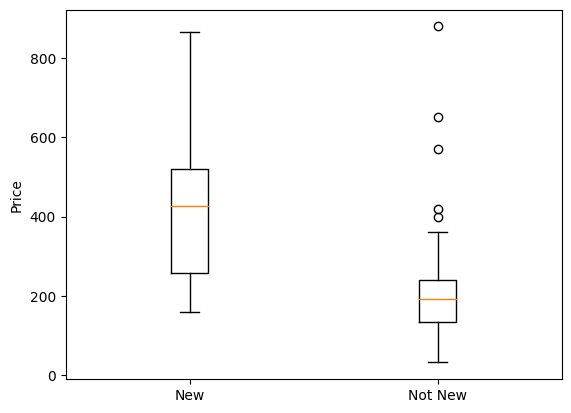

In [ ]:
plt.boxplot([houses[houses['new'] == 1]['price'], houses[houses['new'] == 0]['price']])
plt.xticks([1, 2], ['New', 'Not New'])
plt.ylabel('Price')

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There is a strong relationship between size and price. The correlation is 0.8 which is strong, but the higher the square footage the more variable the price is. The major cluster of homes under 2500sqft is pretty close to the line of best fit.

The relationship  between price and whether or not a house is new is stronger between old houses. There is a much tighter IQR, though it does have several outliers. The new houses have a weaker relationship  with no outliers and a much larger range and IQR.

**Problem 1.22**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [ ]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat",  sep='\\s+')
happy

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male
...,...,...,...,...
2137,2138,3,3,female
2138,2139,3,3,female
2139,2140,3,3,female
2140,2141,3,3,female


In [ ]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
